In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
# downloaded from:
# http://www.nature.com/nature/journal/v542/n7642/fig_tab/nature21360_F1.html
file = 'nature21360-f1.csv'

In [4]:
df = pd.read_csv(file, names=['time', 'flux', 'error'], skiprows=1)
# time = BJD(TDB)-2450000

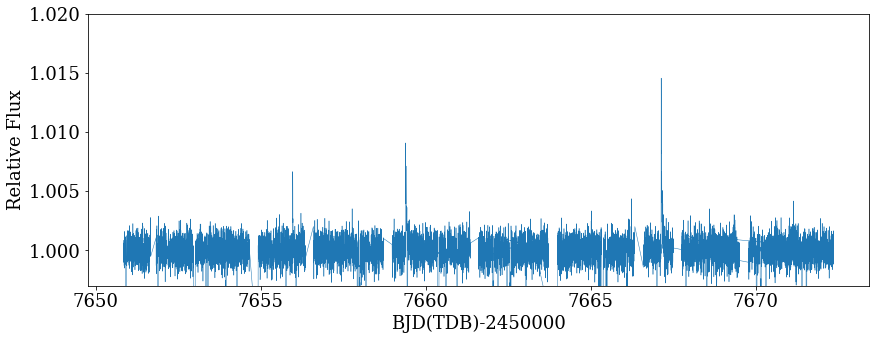

In [5]:
plt.figure(figsize=(14,5))
plt.plot(df['time'], df['flux'], lw=0.5);
plt.ylim(.997,1.02);
plt.xlabel('BJD(TDB)-2450000');
plt.ylabel('Relative Flux');

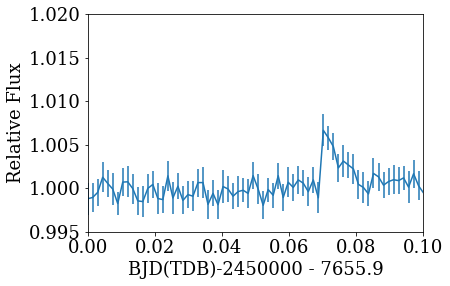

In [6]:
plt.errorbar(df['time'] - 7655.9, df['flux'], df['error']);
plt.xlim(0,0.1);
plt.ylim(.995,1.02);
plt.xlabel('BJD(TDB)-2450000 - 7655.9');
plt.ylabel('Relative Flux');
plt.savefig('trappist1_flare1.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

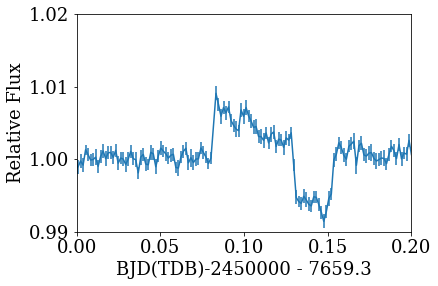

In [7]:
plt.errorbar(df['time'] - 7659.3, df['flux'], df['error']);
plt.xlim(0,0.2);
plt.ylim(.99,1.02);
plt.xlabel('BJD(TDB)-2450000 - 7659.3');
plt.ylabel('Relative Flux');
plt.savefig('trappist1_flare2.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

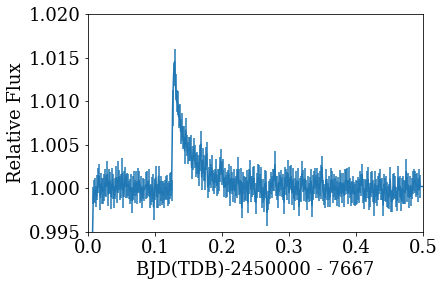

In [36]:
plt.errorbar(df['time']-7667, df['flux'], df['error']);
plt.xlim(0,.5);
plt.ylim(.995,1.02);
plt.xlabel('BJD(TDB)-2450000 - 7667');
plt.ylabel('Relative Flux');
plt.savefig('trappist1_flare3.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

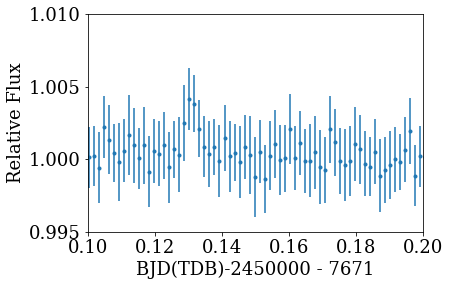

In [45]:
# A 4th little flare
plt.errorbar(df['time']-7671, df['flux'], df['error'], marker='.', linestyle='none');
plt.xlim(.1,.2);
plt.ylim(.995,1.01);
plt.xlabel('BJD(TDB)-2450000 - 7671');
plt.ylabel('Relative Flux');
plt.savefig('trappist1_flare4.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [88]:
# fit each flare w/ aflare model, also compute energy (Equivalent Duration)
tstart = [7655.968, 7659.375, 7667.12, 7671.122]
tstop = [7655.98,7659.42,7667.23, 7671.14]

ed = np.zeros_like(tstart)
for k in range(len(tstart)):
    x = np.where((df['time'] >= tstart[k]) & (df['time'] <= tstop[k]))
    ed[k] = np.trapz(df['flux'].values[x]-1, x=(df['time'].values[x] * 86400.))

print(ed)

[  3.33917778  16.64022161  28.58649594   1.9874659 ]


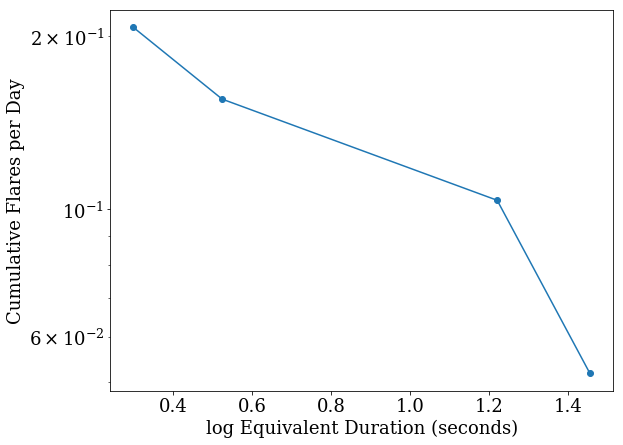

In [91]:
# now plot a Flare Frequency Distribution (FFD)

exptime = np.median(df['time'].values[1:] - df['time'].values[0:-1])
totdur = len(df) * exptime

ffd_x = np.log10(ed[np.argsort(ed)])
ffd_y = (np.arange(len(ffd_x))[::-1] + 1) / totdur

plt.figure(figsize=(9,7))
plt.plot(ffd_x, ffd_y, '-o')
plt.yscale('log')
plt.xlabel('log Equivalent Duration (seconds)')
plt.ylabel('Cumulative Flares per Day')

In [52]:
'''
do some very rough conversions of Kepler FFD into IR, using the following terrible assumptions:
1) that Trappist-1 is an M6 (it's not)
2) that that Spitzer's 3.6micron filter is actually 2MASS Ks (it's not)

this allows me to use the Flare model from Davenport+2012 to put the FFDs on the same plot
'''